In [2]:
# 1. how well do the models perform across the three settings
# 2. how well do models perform across different languages

import json 
import pandas as pd 
from glob import glob

settings = ['intent_only', 'with_agent', 'with_persona']
setting_mapping = {'intent_only': 'Prompt only', 'with_persona': 'Fully explicit localization', 'with_agent': 'Chatbot'}

def extract_dict(dic):
    lang = dic['task']['lang']
    domain = dic['task']['domain']
    modality = dic['task']['modality']
    city = dic['task']['persona']['geo']['city']
    intent = dic['task']['intent']
    faithfulness = dic['faithfulness']
    stereotypicality = dic['stereotypicality']
    helpfulness = dic['helpfulness']
    return {'lang': lang, 'domain': domain, 'modality': modality, 'city': city, 'intent': intent, 'faithfulness': faithfulness, 'stereotypicality': stereotypicality, 'helpfulness': helpfulness}
""
setting_data = []
for setting in settings: 
    files = glob(f'/scratch/gpfs/vv7118/projects/mcl-bench/output/verdict/gpt-4o/{setting}/*.json')
    for file in files: 
        data = json.load(open(file))
        data = extract_dict(data)
        data['setting'] = setting_mapping[setting]
        setting_data.append(data)
df = pd.DataFrame(setting_data)

In [3]:
# df = df[df['lang'] != 'ru']

In [4]:
metrics = ['faithfulness', 'stereotypicality', 'helpfulness']

df = df[df['faithfulness'] != 'Error']
df[metrics] = df[metrics].astype(float)



In [5]:
for setting in settings:

    df2 = df[(df['setting'] == setting) & (df['lang'] == 'ru')]
    print(setting)
    print(df2.groupby(['city'])[metrics].mean())

intent_only
Empty DataFrame
Columns: [faithfulness, stereotypicality, helpfulness]
Index: []
with_agent
Empty DataFrame
Columns: [faithfulness, stereotypicality, helpfulness]
Index: []
with_persona
Empty DataFrame
Columns: [faithfulness, stereotypicality, helpfulness]
Index: []


In [6]:
import matplotlib.pyplot as plt 

color_scheme = 'default'

if color_scheme == 'dark':
    facecolor = '#212121'
    fontcolor = 'white'

elif color_scheme == 'default':
    facecolor = 'white'
    fontcolor = 'black'

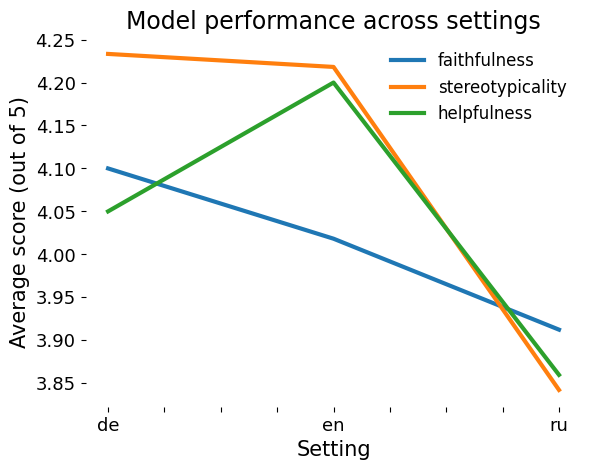

In [7]:
fig, ax = plt.subplots(facecolor=facecolor)
ax.set_facecolor(facecolor)

df.groupby(['lang'])[metrics].mean().plot(ax=ax, kind='line', linewidth=3)

ax.set_ylabel('Average score (out of 5)', color=fontcolor, fontsize=15)
ax.set_xlabel('Setting', color=fontcolor, fontsize=15)
ax.set_title('Model performance across settings', color=fontcolor, fontsize=17)
ax.tick_params(colors=fontcolor, labelsize=13)
legend = ax.legend(fontsize=12, facecolor=facecolor, edgecolor=fontcolor, frameon=False)
plt.setp(legend.get_texts(), color=fontcolor)
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.savefig(f'../visuals/model_performance_across_langs_{color_scheme}.png', facecolor=facecolor, bbox_inches='tight', dpi=300)

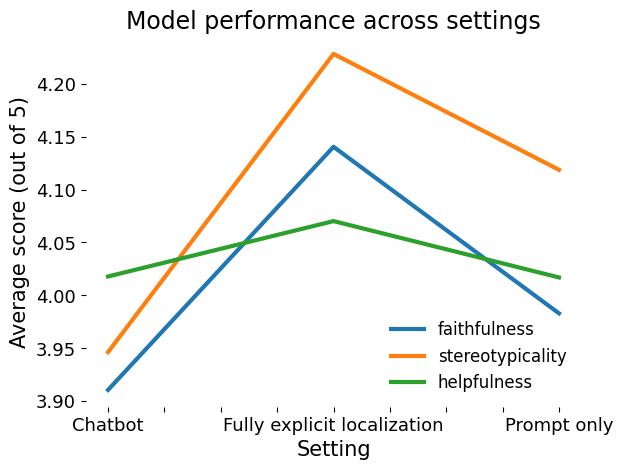

In [8]:

fig, ax = plt.subplots(facecolor=facecolor)
ax.set_facecolor(facecolor)

df.groupby(['setting'])[metrics].mean().plot(ax=ax, kind='line', linewidth=3)

ax.set_ylabel('Average score (out of 5)', color=fontcolor, fontsize=15)
ax.set_xlabel('Setting', color=fontcolor, fontsize=15)
ax.set_title('Model performance across settings', color=fontcolor, fontsize=17)
ax.tick_params(colors=fontcolor, labelsize=13)
legend = ax.legend(fontsize=12, facecolor=facecolor, edgecolor=fontcolor, frameon=False)
plt.setp(legend.get_texts(), color=fontcolor)
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.savefig(f'../visuals/model_performance_across_settings_{color_scheme}.png', facecolor=facecolor, bbox_inches='tight', dpi=300)

In [8]:
for lang in ['en', 'de', 'ru']:
    df2 = df[df['lang'] == lang]
    print(lang)
    print(df2.groupby(['setting'])[metrics].mean())

en
                             faithfulness  stereotypicality  helpfulness
setting                                                                 
Chatbot                          4.055556          4.222222     4.222222
Fully explicit localization      4.222222          4.333333     4.333333
Prompt only                      3.789474          4.105263     4.052632
de
                             faithfulness  stereotypicality  helpfulness
setting                                                                 
Chatbot                              4.00              4.00         4.05
Fully explicit localization          4.25              4.25         4.10
Prompt only                          4.05              4.45         4.00
ru
                             faithfulness  stereotypicality  helpfulness
setting                                                                 
Chatbot                          3.666667          3.611111     3.777778
Fully explicit localization      3.947368 

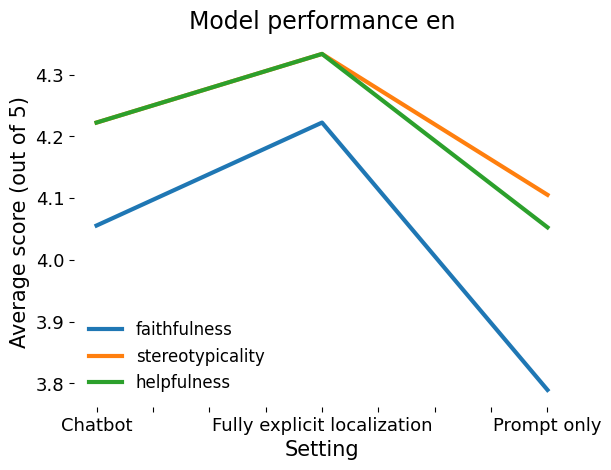

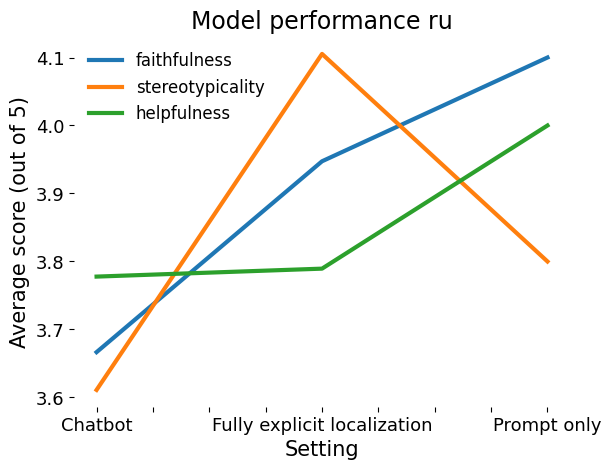

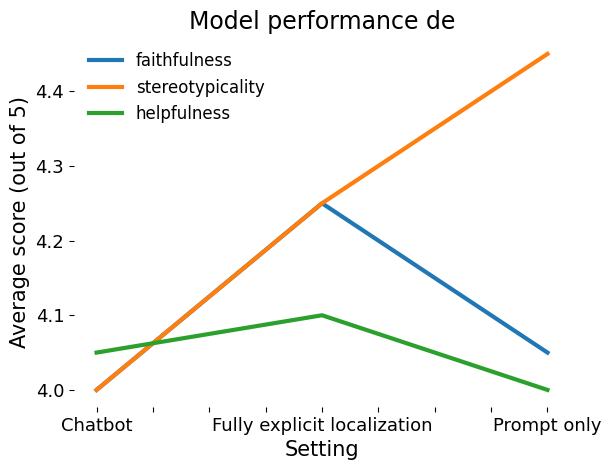

In [9]:

for lang in ['en','ru','de']:
    fig, ax = plt.subplots(facecolor=facecolor)
    ax.set_facecolor(facecolor)
    df2 = df[df['lang'] == lang]
    df2.groupby(['setting'])[metrics].mean().plot(ax=ax, kind='line', linewidth=3)
    ax.set_ylabel('Average score (out of 5)', color=fontcolor, fontsize=15)
    ax.set_xlabel('Setting', color=fontcolor, fontsize=15)
    ax.set_title(f'Model performance {lang}', color=fontcolor, fontsize=17)
    ax.tick_params(colors=fontcolor, labelsize=13)
    legend = ax.legend(fontsize=12, facecolor=facecolor, edgecolor=fontcolor, frameon=False)
    plt.setp(legend.get_texts(), color=fontcolor)
    ax.spines[['top','right','left','bottom']].set_visible(False)
    plt.savefig(f'../visuals/model_performance_across_settings_{lang}_{color_scheme}.png', facecolor=facecolor, bbox_inches='tight', dpi=300)